In [ ]:
!pip install opencv-python

In [65]:
# check opencv version
import cv2
# print version number
print(cv2.__version__)
# https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/

4.8.0


In [66]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Face Detection**
Face detection is a problem in computer vision of locating and localizing one or more faces in a photograph.

Locating a face in a photograph refers to finding the coordinate of the face in the image, whereas localization refers to demarcating the extent of the face, often via a bounding box around the face.

In [74]:
from cv2 import imread
from cv2 import CascadeClassifier
# load the pre-trained model
classifier = CascadeClassifier('/content/drive/MyDrive/haarcascade_frontalface_default.xml')

In [31]:
classifier

< cv2.CascadeClassifier 0x7df867450b90>

# **Face Detection With OpenCV**
Feature-based face detection algorithms are fast and effective and have been used successfully for decades.

Perhaps the most successful example is a technique called cascade classifiers first described by Paul Viola and Michael Jones and their 2001 paper titled “Rapid Object Detection using a Boosted Cascade of Simple Features.”

In the paper, effective features are learned using the AdaBoost algorithm, although importantly, multiple models are organized into a hierarchy or “cascade.”

In the paper, the AdaBoost model is used to learn a range of very simple or weak features in each face, that together provide a robust classifier.

In [78]:
# load the photograph
pixels = imread('/content/drive/MyDrive/Image_data_mining_images/SJSU_Project_Expo.jpg')
pixels

array([[[217, 218, 222],
        [215, 216, 220],
        [212, 215, 220],
        ...,
        [ 86,  89,  74],
        [ 83,  82,  72],
        [ 86,  87,  77]],

       [[218, 219, 223],
        [218, 219, 223],
        [214, 217, 221],
        ...,
        [ 87,  88,  78],
        [ 94,  95,  85],
        [ 88,  89,  79]],

       [[215, 218, 222],
        [217, 220, 224],
        [216, 219, 223],
        ...,
        [ 80,  80,  68],
        [ 83,  87,  76],
        [ 84,  88,  77]],

       ...,

       [[ 18,  10,  10],
        [ 18,   7,   9],
        [ 25,  18,  21],
        ...,
        [  8,   2,   7],
        [ 14,   9,  11],
        [ 18,  12,  17]],

       [[ 24,  21,  30],
        [ 32,  30,  42],
        [ 33,  31,  43],
        ...,
        [ 15,  10,  12],
        [ 11,   6,   7],
        [ 18,  13,  15]],

       [[ 29,  29,  47],
        [ 40,  45,  70],
        [ 35,  39,  63],
        ...,
        [ 20,  15,  17],
        [ 12,   7,   8],
        [ 12,   7,   8]]

In [79]:
# load the pre-trained model
classifier = CascadeClassifier('/content/drive/MyDrive/haarcascade_frontalface_default.xml')


**The Classifier Cascade**

A modern implementation of the Classifier Cascade face detection algorithm is provided in the OpenCV library. This is a C++ computer vision library that provides a python interface. The benefit of this implementation is that it provides pre-trained face detection models, and provides an interface to train a model on your own dataset.

In [80]:
# perform face detection
bboxes = classifier.detectMultiScale(pixels)
# print bounding box for each detected face
for box in bboxes:
  print(box)

[711 549  75  75]
[225 656  25  25]


# detectMultiScale() function
The detectMultiScale() function provides some arguments to help tune the usage of the classifier. Two parameters of note are scaleFactor and minNeighbors; for example:

The scaleFactor controls how the input image is scaled prior to detection, e.g. is it scaled up or down, which can help to better find the faces in the image. The default value is 1.1 (10% increase), although this can be lowered to values such as 1.05 (5% increase) or raised to values such as 1.4 (40% increase).


The minNeighbors determines how robust each detection must be in order to be reported, e.g. the number of candidate rectangles that found the face. The default is 3, but this can be lowered to 1 to detect a lot more faces and will likely increase the false positives, or increase to 6 or more to require a lot more confidence before a face is detected.


The scaleFactor and minNeighbors often require tuning for a given image or dataset in order to best detect the faces. It may be helpful to perform a sensitivity analysis across a grid of values and see what works well or best in general on one or multiple photographs.



In [81]:
from cv2 import rectangle
# extract

bboxes = classifier.detectMultiScale(pixels)
# print bounding box for each detected face
for box in bboxes:
  print(box)
  x, y, width, height = box
  x2, y2 = x + width, y + height
  # draw a rectangle over the pixels
  rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)

[711 549  75  75]
[225 656  25  25]


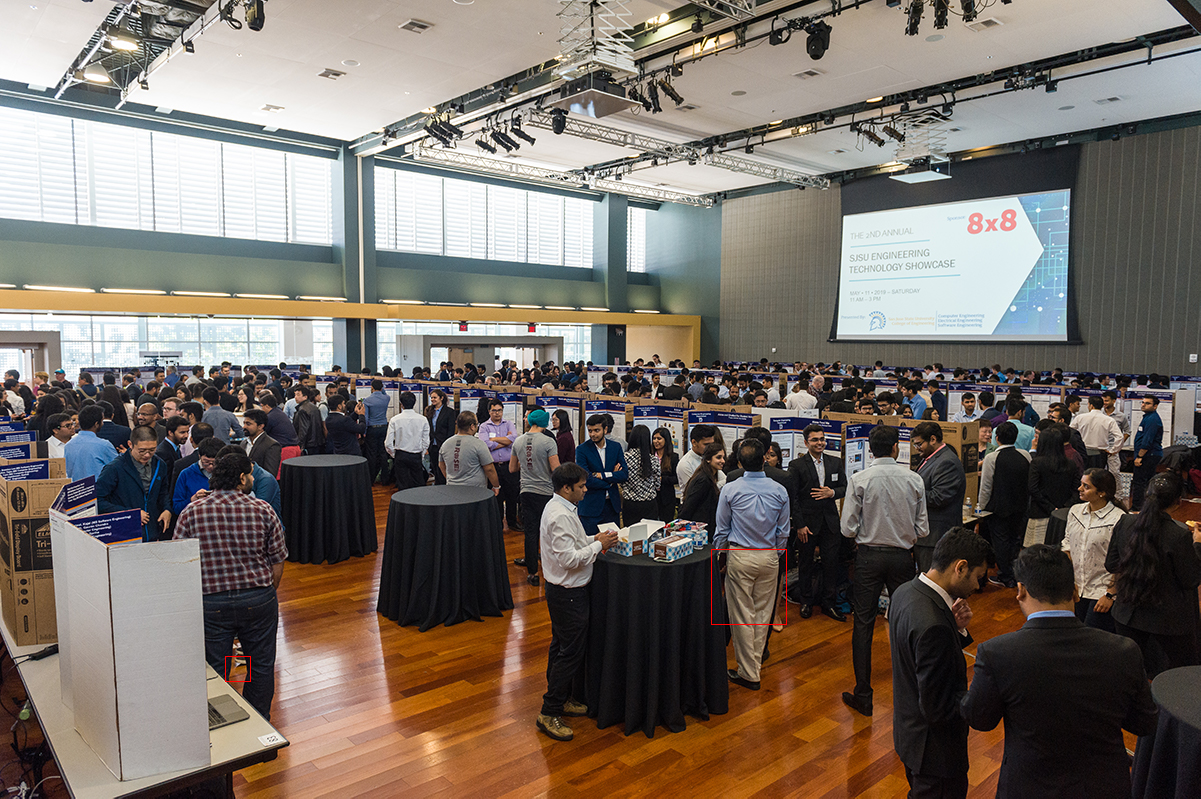

In [82]:
from google.colab.patches import cv2_imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
# show the image
cv2_imshow(pixels)

# keep the window open until we press a key
waitKey(0)
# close the window
destroyAllWindows()


# **Modification to Process all images together:**

[540 319  26  26]
[582 381  26  26]
[421 425  24  24]
[342 426  25  25]
[114 428  25  25]
[193 430  25  25]
[263 430  25  25]


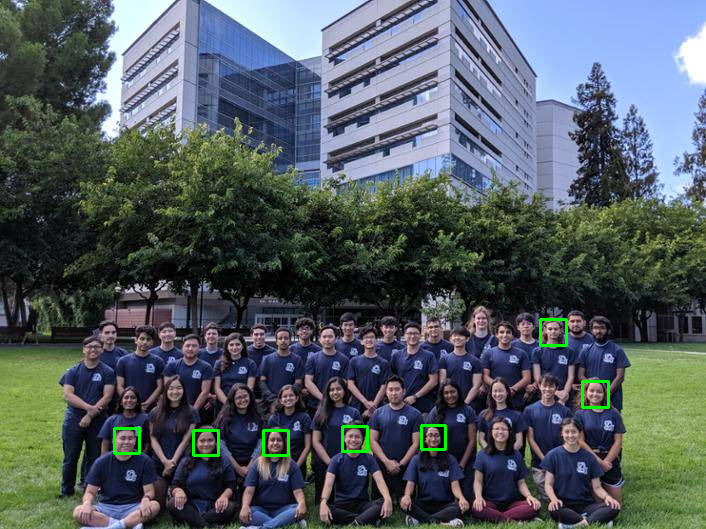

[711 549  75  75]
[225 656  25  25]


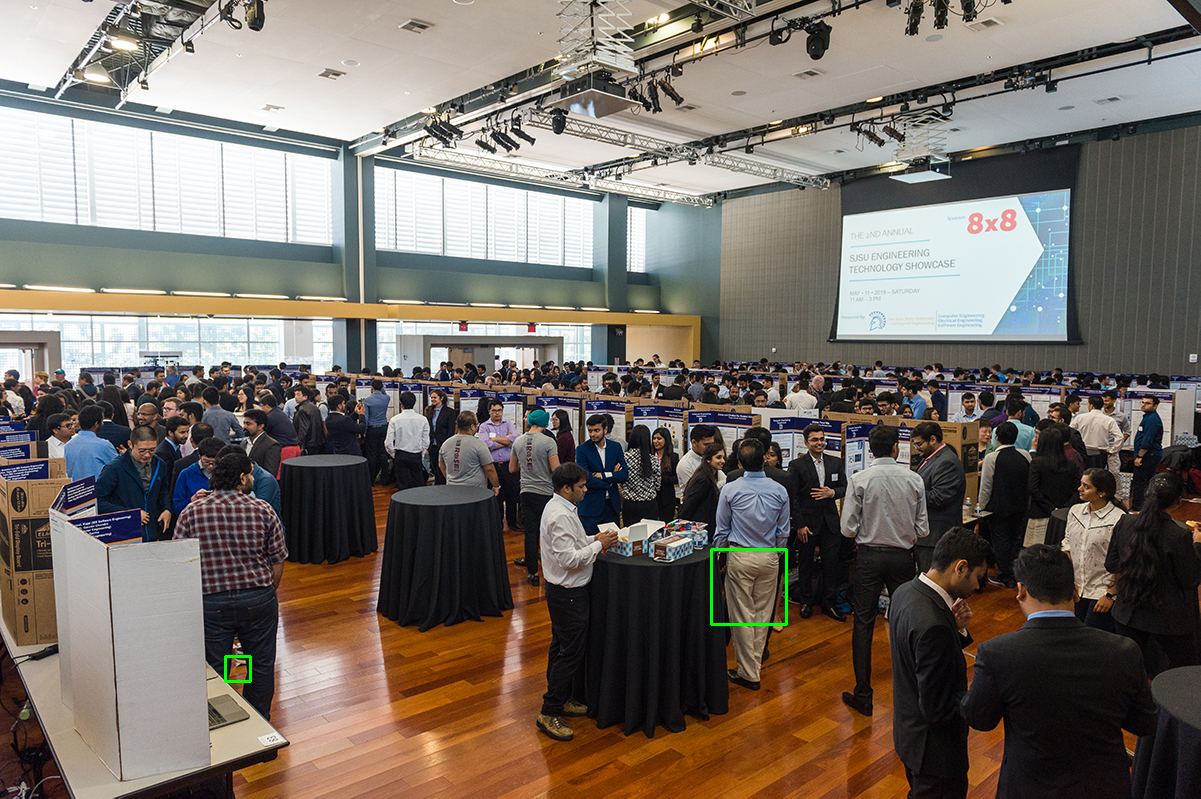

[532  80  24  24]
[608  78  24  24]
[688  77  27  27]
[765  78  28  28]
[847  78  26  26]
[928  81  27  27]
[1090   81   27   27]
[1008   84   26   26]
[1171   84   28   28]
[607 168  26  26]
[927 168  26  26]
[1088  174   45   45]
[684 172  53  53]
[950 172  51  51]
[673 156  52  52]
[1199  168   59   59]
[553 174  55  55]
[1169  175   26   26]
[609 220  52  52]
[793 217  45  45]
[498 214  53  53]
[894 217  52  52]
[374 190  56  56]
[430 198  55  55]
[1005  206   57   57]
[1361  205   53   53]
[849 185  52  52]
[ 79 190  56  56]
[310 197  51  51]
[1135  241   52   52]
[1258  242   52   52]
[698 247  49  49]
[222 184  60  60]
[1250  402   28   28]
[1132  301   56   56]
[758 368 134 134]
[1375  474   65   65]
[1381  539   59   59]
[1374  597   70   70]


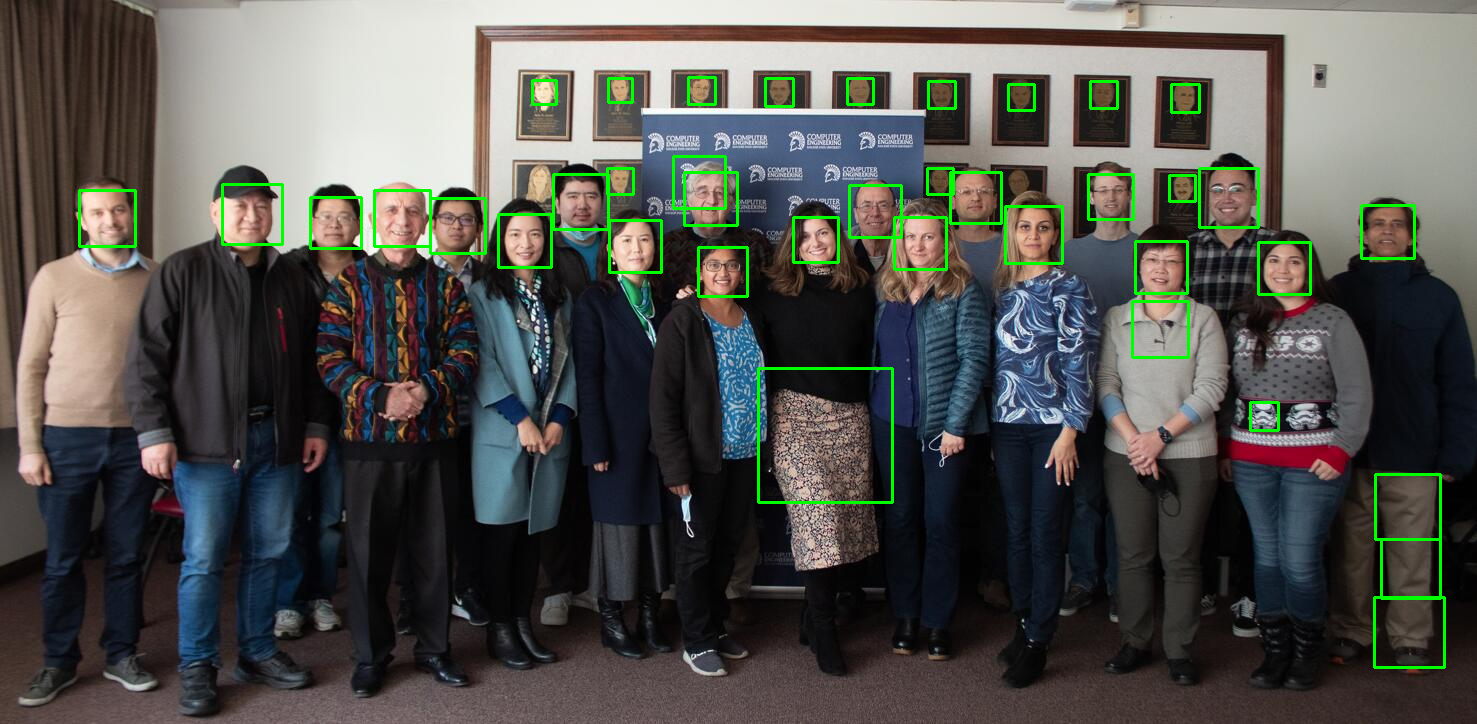

In [44]:
from cv2 import imread, CascadeClassifier, rectangle, waitKey, destroyAllWindows
from google.colab.patches import cv2_imshow

# Load the pre-trained model
classifier = CascadeClassifier('/content/drive/MyDrive/haarcascade_frontalface_default.xml')

# Check if the classifier is loaded correctly
if classifier.empty():
    print("Error loading cascade classifier")
    exit()

# List of image paths
image_paths = [
    '/content/drive/MyDrive/Image_data_mining_images/SJSUOfficers2019.jpg',
    '/content/drive/MyDrive/Image_data_mining_images/SJSU_Project_Expo.jpg',
    '/content/drive/MyDrive/Image_data_mining_images/cmpe-department1.jpg'
]

# Loop through each image
for image_path in image_paths:
    # Load the image
    image = imread(image_path)

    # Check if the image is loaded correctly
    if image is None:
        print(f"Error loading image: {image_path}")
        continue

    # Perform face detection
    bboxes = classifier.detectMultiScale(image, scaleFactor=1.1, minNeighbors=3)

    # For each detected face, draw a rectangle around it and print the bounding box coordinates
    for box in bboxes:
        # Unpack the bounding box
        x, y, width, height = box
        # Print the bounding box (x, y, width, height)
        print(box)
        # Draw a rectangle around each face
        rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)

    # Display the image with detected faces using cv2_imshow for Google Colab
    cv2_imshow(image)
    waitKey(0)
    destroyAllWindows()
